<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/Linear_Regression_Concrete_Assignment_280325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prathamtripathi/regression-with-neural-networking")

print("Path to dataset files:", path)

100%|██████████| 11.1k/11.1k [00:00<00:00, 3.13MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prathamtripathi/regression-with-neural-networking/versions/1


In [4]:
# Concrete Strength dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/prathamtripathi/regression-with-neural-networking/versions/1/concrete_data.csv")

#Loading first 5 rowa of the dataset
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.duplicated().sum()

np.int64(25)

In [6]:
df.drop_duplicates(inplace= True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum().any()

np.False_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
Blast Furnace Slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
Fly Ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
Water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
Superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
Coarse Aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
Fine Aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
Age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
Strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [ ]:
'''
1. For 'Cement' , 'Blast Furnace Slag', 'Fly Ash' and 'Age', Mean values are greater than Median , Implying that there are outliers in right tail.
2. For 'Water', 'Superlasticizer', 'Coarse Aggregate' , 'Fine Aggregate' and 'Strength' , Mean and Median values are almost similer , implying normally distributed data.
'''

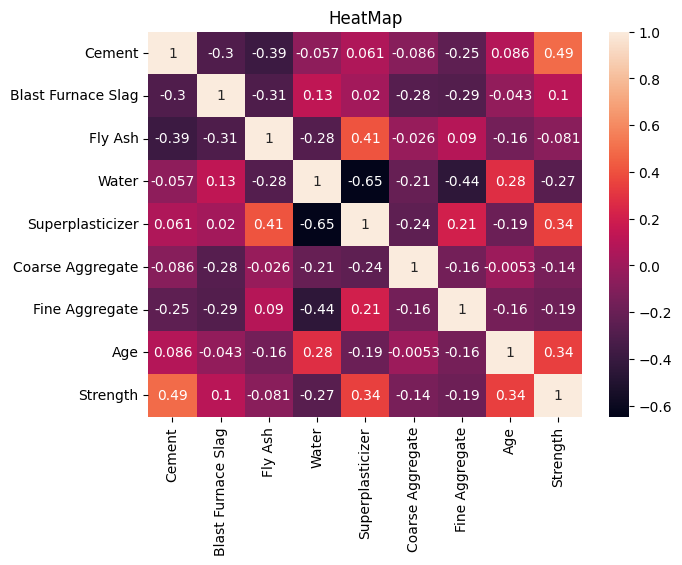

In [ ]:
# Correlation
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(numeric_only= True), annot = True)
plt.title('HeatMap')
plt.show()

In [ ]:
'''
1. 'Age', 'Cement' and 'Superplasticizer' have a Medium positive correlation with Strength
2. 'Blast Furnace Slag' have a weak positive correlation with strength
3. 'Water', 'Coarse Aggregate' and 'Fine Aggregate' have a weak negative correlation with strength

4. 'Superplasticizer'and 'Fine Aggregate' have medium negative correlation with 'Water'
5. 'Fly Ash' and 'Coarse Aggregate' have weak negative correlation and 'Age' and 'Blast Furnace Slag' have weak positive correlation with 'Water'
6. 'Superplasticizer' and 'Fly Ash' have a Weak positive correlation with each other
'''

In [ ]:
'''
The feature set includes:

Cement
Blast Furnace Slag
Fly Ash
Water
Super-plasticizer
Coarse Aggregate
Fine Aggregate
Age

The target set is:
Strength of the Cement
'''

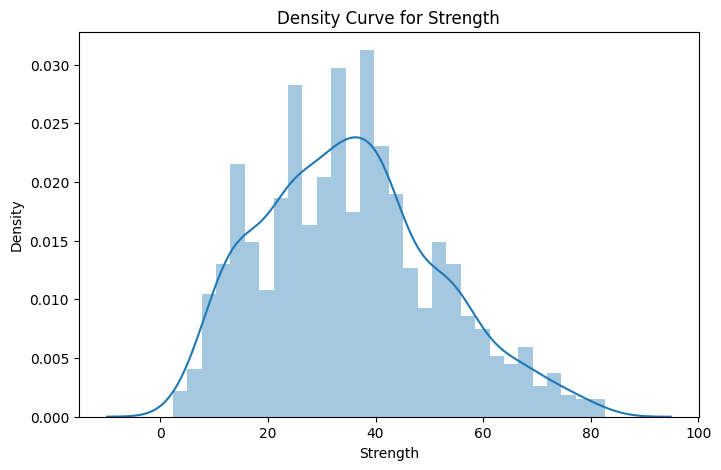

In [ ]:
# Outlier Analysis on Target Variable
plt.figure(figsize = (8, 5))
sns.distplot(df['Strength'], bins = 30)
plt.title('Density Curve for Strength')
plt.show()

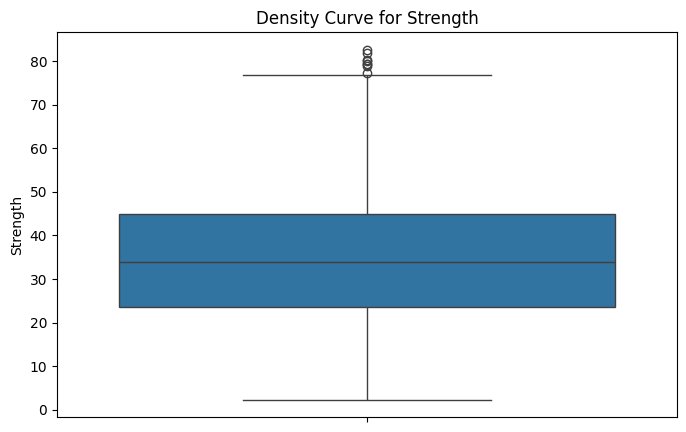

In [ ]:
#Boxplot
plt.figure(figsize = (8, 5))
sns.boxplot(df, y = df['Strength'])
plt.title('Density Curve for Strength')
plt.show()

In [7]:
# Removing Outliers
df = df[df['Strength'] < 75]

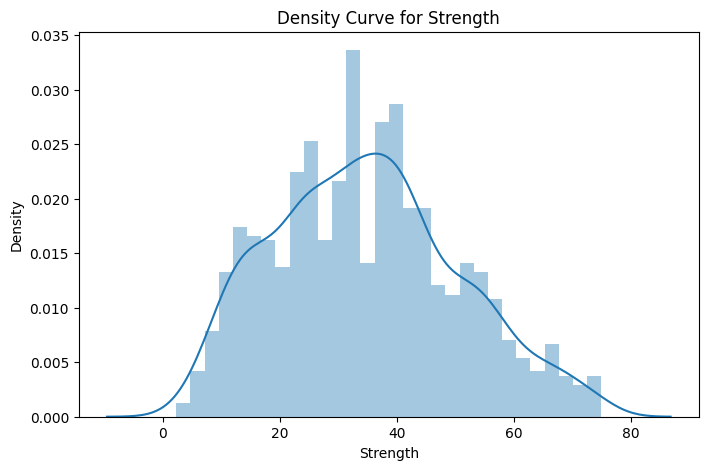

In [ ]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Strength'], bins = 30)
plt.title('Density Curve for Strength')
plt.show()

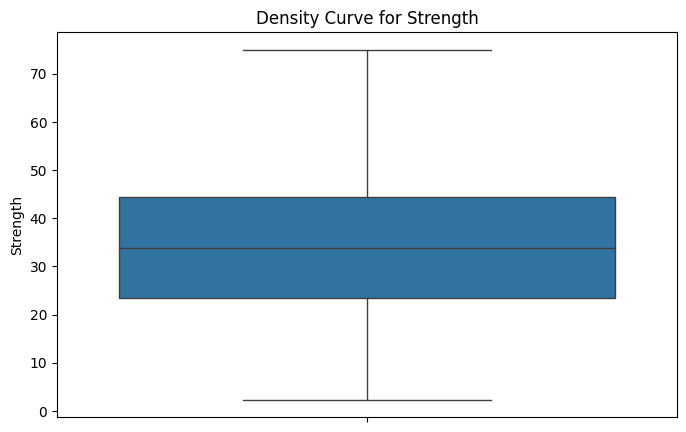

In [ ]:
plt.figure(figsize = (8, 5))
sns.boxplot(df, y = df['Strength'])
plt.title('Density Curve for Strength')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 1 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              994 non-null    float64
 1   Blast Furnace Slag  994 non-null    float64
 2   Fly Ash             994 non-null    float64
 3   Water               994 non-null    float64
 4   Superplasticizer    994 non-null    float64
 5   Coarse Aggregate    994 non-null    float64
 6   Fine Aggregate      994 non-null    float64
 7   Age                 994 non-null    int64  
 8   Strength            994 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 77.7 KB


# Simple Linear Regression


In [8]:
# Seperating input and output features
X = df['Cement'].to_numpy().reshape(-1, 1)
y = df['Strength']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [9]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [11]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.19
Training R2 Score : 0.25


In [12]:
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Training RMSE : 13.6
Testing RMSE : 14.27


# Multiple Linear Regression

In [13]:
# Seperating input and output features
X = df[['Cement', 'Age', 'Superplasticizer']]
y = df['Strength']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [14]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [16]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.46
Training R2 Score : 0.47


In [17]:
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Training RMSE : 11.39
Testing RMSE : 11.6
